#### PAIR PROGRAMMING - REGRESIÓN LOGÍSTICA - PREPROCESADO

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
import sidetable


# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


# Estandarización variables numéricas y Codificación variables categóricas
# ------------------------------------------------------------------------------
from sklearn.preprocessing import RobustScaler

# Gestión datos desbalanceados
# ------------------------------------------------------------------------------
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

# Para separar los datos en train y test
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OrdinalEncoder

#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


Cuando nos enfrentamos a problemas de regresión lineal vimos que eran necesarios algunos cambios antes de poder ajustar los modelos. En el caso de la regresión logística lo tendremos que hacer. Estos cambios incluyen:
- Estandarización de las variables predictoras numéricas
- Codificación de las variables categóricas
- Balanceo de la variable respuesta

In [2]:
df = pd.read_pickle('../datos/df_eda.pkl')

In [3]:
pd.options.display.max_columns= None

In [4]:
df.head()

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure/arrival_time_convenient,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,2,2,4,2,3,3,0,3,5,3,2,0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,3,0,2,2,3,4,4,4,2,3,2,310
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,3,2,0,2,2,3,3,4,4,4,2,0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,3,3,4,3,1,1,0,1,4,1,3,0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,3,4,3,4,2,2,0,2,4,2,5,0


- Estandarización de las variables predictoras numéricas

In [5]:
# Como hemos decidido no tratar los outliers durante el EDA, ahora vamos a usar el método RobustScaler para la estandarización 
# de las variables numéricas

df_num = df.select_dtypes(include = np.number)
df_num.head()

,age,flight_distance,departure_delay_in_minutes
0,65,265,0
1,47,2464,310
2,15,2138,0
3,60,623,0
4,70,354,0


In [6]:
# construimos el modelo de escalador
robust = RobustScaler()

In [7]:
# ajustamos el modelo utilizando nuestro set de datos
robust.fit(df_num)

RobustScaler()

In [8]:
# transformamos los datos
X_robust = robust.transform(df_num)

In [9]:
# por último convertiremos el array que nos devuelve en un dataframe. 

numericas_robust = pd.DataFrame(X_robust, columns = df_num.columns)
numericas_robust.head(2)

,age,flight_distance,departure_delay_in_minutes
0,1.041667,-1.400844,0.000000
1,0.291667,0.454852,25.833333


In [10]:
df_num.shape

(129880, 3)

In [11]:
for columna in numericas_robust.columns:
    print(f'La media de la columna {columna} es:  {numericas_robust[columna].mean()}')
    print(f'La desviación estándar de la columna {columna} es: {numericas_robust[columna].std()}')
    print("-------------------------------------------------------------")

La media de la columna age es:  -0.023835142695819204
La desviación estándar de la columna age es: 0.6299733312653976
-------------------------------------------------------------
La media de la columna flight_distance es:  0.047602577647137045
La desviación estándar de la columna flight_distance es: 0.866764224146333
-------------------------------------------------------------
La media de la columna departure_delay_in_minutes es:  1.2261427214865093
La desviación estándar de la columna departure_delay_in_minutes es: 3.172593851254228
-------------------------------------------------------------


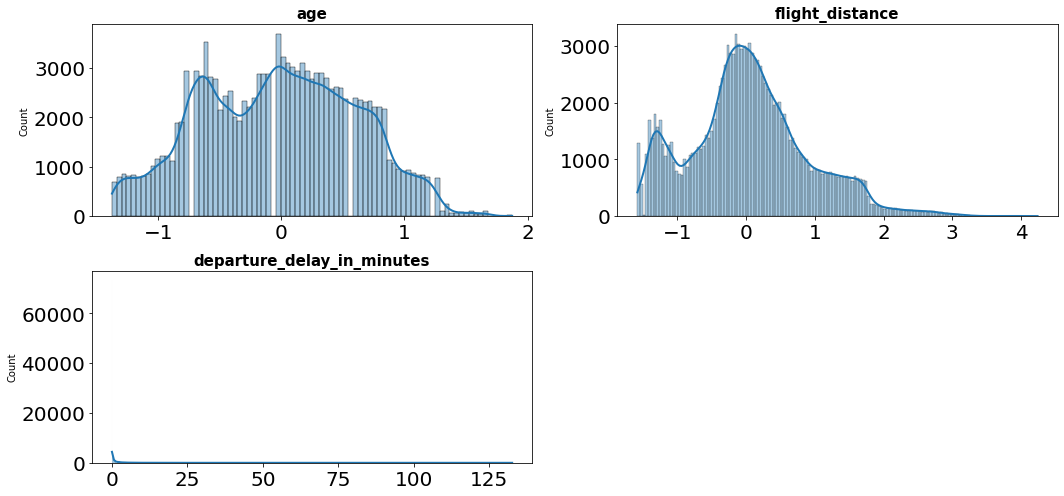

In [12]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 7))

columnas_robust = numericas_robust.columns
axes = axes.flat


for i, colum in enumerate(columnas_robust): 
    sns.histplot(
        data = numericas_robust,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.4, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout()

fig.delaxes(axes[-1])
# fig.delaxes(axes[-2])
# fig.delaxes(axes[-3])

In [13]:
# vamos a guardar este dataframe 

df[numericas_robust.columns] = numericas_robust
df.head()

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure/arrival_time_convenient,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes
0,satisfied,Female,Loyal Customer,1.041667,Personal Travel,Eco,-1.400844,0,0,2,2,4,2,3,3,0,3,5,3,2,0.000000
1,satisfied,Male,Loyal Customer,0.291667,Personal Travel,Business,0.454852,0,0,3,0,2,2,3,4,4,4,2,3,2,25.833333
2,satisfied,Female,Loyal Customer,-1.041667,Personal Travel,Eco,0.179747,0,0,3,2,0,2,2,3,3,4,4,4,2,0.000000
3,satisfied,Female,Loyal Customer,0.833333,Personal Travel,Eco,-1.098734,0,0,3,3,4,3,1,1,0,1,4,1,3,0.000000
4,satisfied,Female,Loyal Customer,1.250000,Personal Travel,Eco,-1.325738,0,0,3,4,3,4,2,2,0,2,4,2,5,0.000000


In [14]:
df.isnull().sum()

satisfaction                         0
gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
class                                0
flight_distance                      0
seat_comfort                         0
departure/arrival_time_convenient    0
gate_location                        0
inflight_wifi_service                0
inflight_entertainment               0
online_support                       0
ease_of_online_booking               0
on-board_service                     0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
cleanliness                          0
online_boarding                      0
departure_delay_in_minutes           0
dtype: int64

- Codificación de las variables categóricas

In [15]:
df_cat = df.select_dtypes(exclude = np.number)
df_cat.head()

,satisfaction,gender,customer_type,type_of_travel,class,seat_comfort,departure/arrival_time_convenient,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding
0,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,2,2,4,2,3,3,0,3,5,3,2
1,satisfied,Male,Loyal Customer,Personal Travel,Business,0,0,3,0,2,2,3,4,4,4,2,3,2
2,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,3,2,0,2,2,3,3,4,4,4,2
3,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,3,3,4,3,1,1,0,1,4,1,3
4,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,3,4,3,4,2,2,0,2,4,2,5


In [16]:
df['class'].unique()

['Eco', 'Business', 'Eco Plus']
Categories (3, object): ['Business', 'Eco', 'Eco Plus']

In [17]:
df_codificadas = df[['gender', 'customer_type', 'type_of_travel', 'class']]
df_codificadas.head()

,gender,customer_type,type_of_travel,class
0,Female,Loyal Customer,Personal Travel,Eco
1,Male,Loyal Customer,Personal Travel,Business
2,Female,Loyal Customer,Personal Travel,Eco
3,Female,Loyal Customer,Personal Travel,Eco
4,Female,Loyal Customer,Personal Travel,Eco


- Variables a codificar : gender, customer_type, type_of_travel y class
* El resto ya se encontraban codificadas de antemano (eran numéricas pero categóricas encubiertas)

VARIABLES A CODIFICAR - DETERMINAR ORDEN:

- gender : es categórica de tipo binario, que tiene orden.
- customer_type: es de tipo binario también y, por tanto, tiene orden
- type_of_travel: de tipo binario; tiene orden
- class: 


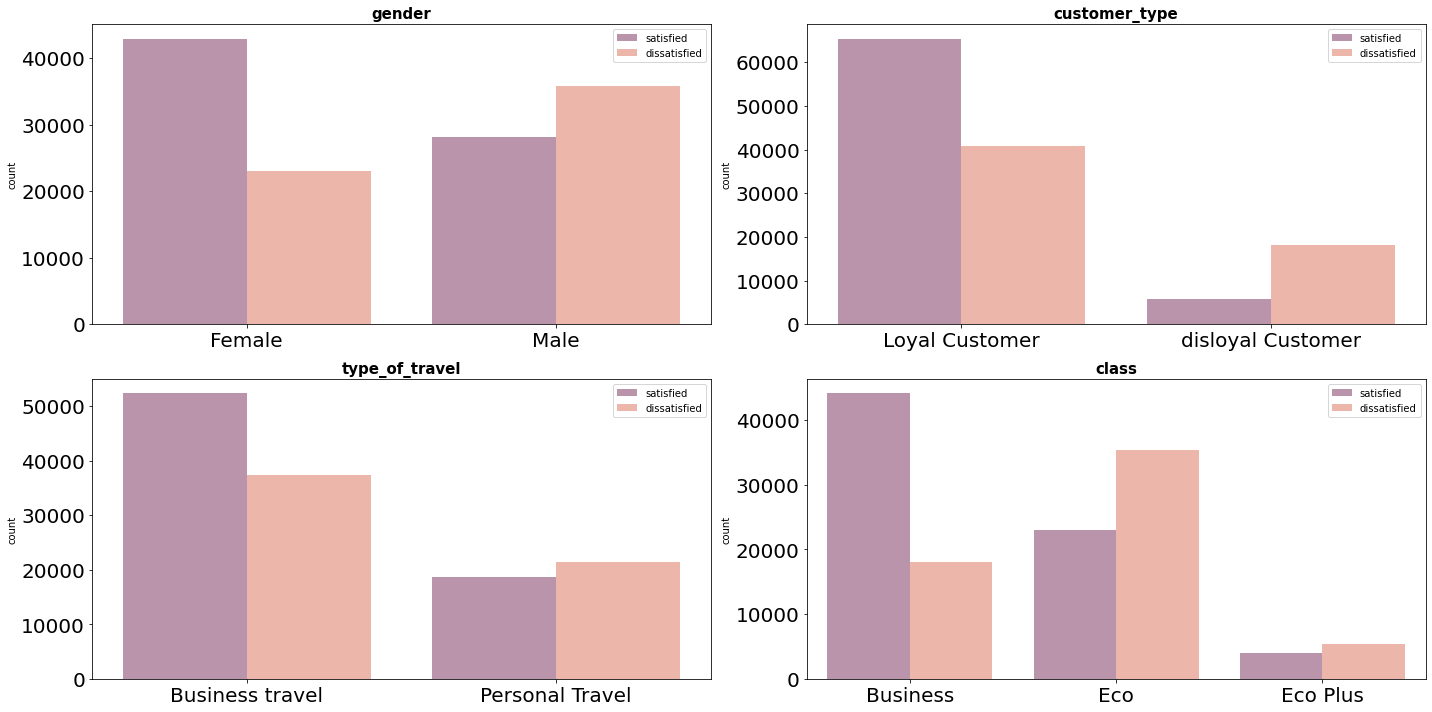

In [18]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 10))

axes = axes.flat

for i, colum in enumerate(df_codificadas.columns): 
    sns.countplot(
        data = df,
        x = colum,
        hue = "satisfaction",
        palette = 'rocket',
        alpha = 0.5, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].legend(loc= "upper right")
    
fig.tight_layout();

### GENDER

In [19]:
df.stb.freq(['gender', 'satisfaction'])

,gender,satisfaction,count,percent,cumulative_count,cumulative_percent
0,Female,satisfied,42928,33.052048,42928,33.052048
1,Male,dissatisfied,35822,27.580844,78750,60.632892
2,Male,satisfied,28159,21.680782,106909,82.313674
3,Female,dissatisfied,22971,17.686326,129880,100.000000


In [20]:
mapa_gender = {'Male':1, 'Female':0}

In [21]:
df['gender'] = df['gender'].map(mapa_gender)

### CUSTOMER TYPE

In [22]:
df.stb.freq(['customer_type', 'satisfaction'])

,customer_type,satisfaction,count,percent,cumulative_count,cumulative_percent
0,Loyal Customer,satisfied,65387,50.344164,65387,50.344164
1,Loyal Customer,dissatisfied,40713,31.346628,106100,81.690791
2,disloyal Customer,dissatisfied,18080,13.920542,124180,95.611334
3,disloyal Customer,satisfied,5700,4.388666,129880,100.000000


In [23]:
mapa_customer = {'Loyal Customer':1, 'disloyal Customer':0}

In [24]:
df['customer_type'] = df['customer_type'].map(mapa_customer)

### TYPE OF TRAVEL

In [25]:
df.stb.freq(['type_of_travel', 'satisfaction'])

,type_of_travel,satisfaction,count,percent,cumulative_count,cumulative_percent
0,Business travel,satisfied,52356,40.311056,52356,40.311056
1,Business travel,dissatisfied,37337,28.747305,89693,69.058362
2,Personal Travel,dissatisfied,21456,16.519864,111149,85.578226
3,Personal Travel,satisfied,18731,14.421774,129880,100.000000


In [26]:
mapa_travel = {'Business travel':1, 'Personal Travel':0}

In [27]:
df['type_of_travel'] = df['type_of_travel'].map(mapa_travel)

### CLASS

In [28]:
df.stb.freq(['class', 'satisfaction'])

,class,satisfaction,count,percent,cumulative_count,cumulative_percent
0,Business,satisfied,44095,33.950570,44095,33.950570
1,Eco,dissatisfied,35336,27.206652,79431,61.157222
2,Eco,satisfied,22973,17.687866,102404,78.845088
3,Business,dissatisfied,18065,13.908993,120469,92.754081
4,Eco Plus,dissatisfied,5392,4.151524,125861,96.905605
5,Eco Plus,satisfied,4019,3.094395,129880,100.000000


In [29]:
mapa_class = {'Eco Plus':0, 'Eco':2, 'Business':1}

In [30]:
df['class'] = df['class'].map(mapa_class)

In [31]:
df.head()

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure/arrival_time_convenient,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes
0,satisfied,0,1,1.041667,0,2,-1.400844,0,0,2,2,4,2,3,3,0,3,5,3,2,0.000000
1,satisfied,1,1,0.291667,0,1,0.454852,0,0,3,0,2,2,3,4,4,4,2,3,2,25.833333
2,satisfied,0,1,-1.041667,0,2,0.179747,0,0,3,2,0,2,2,3,3,4,4,4,2,0.000000
3,satisfied,0,1,0.833333,0,2,-1.098734,0,0,3,3,4,3,1,1,0,1,4,1,3,0.000000
4,satisfied,0,1,1.250000,0,2,-1.325738,0,0,3,4,3,4,2,2,0,2,4,2,5,0.000000


## RESTO VARIABLES CATEGÓRICAS

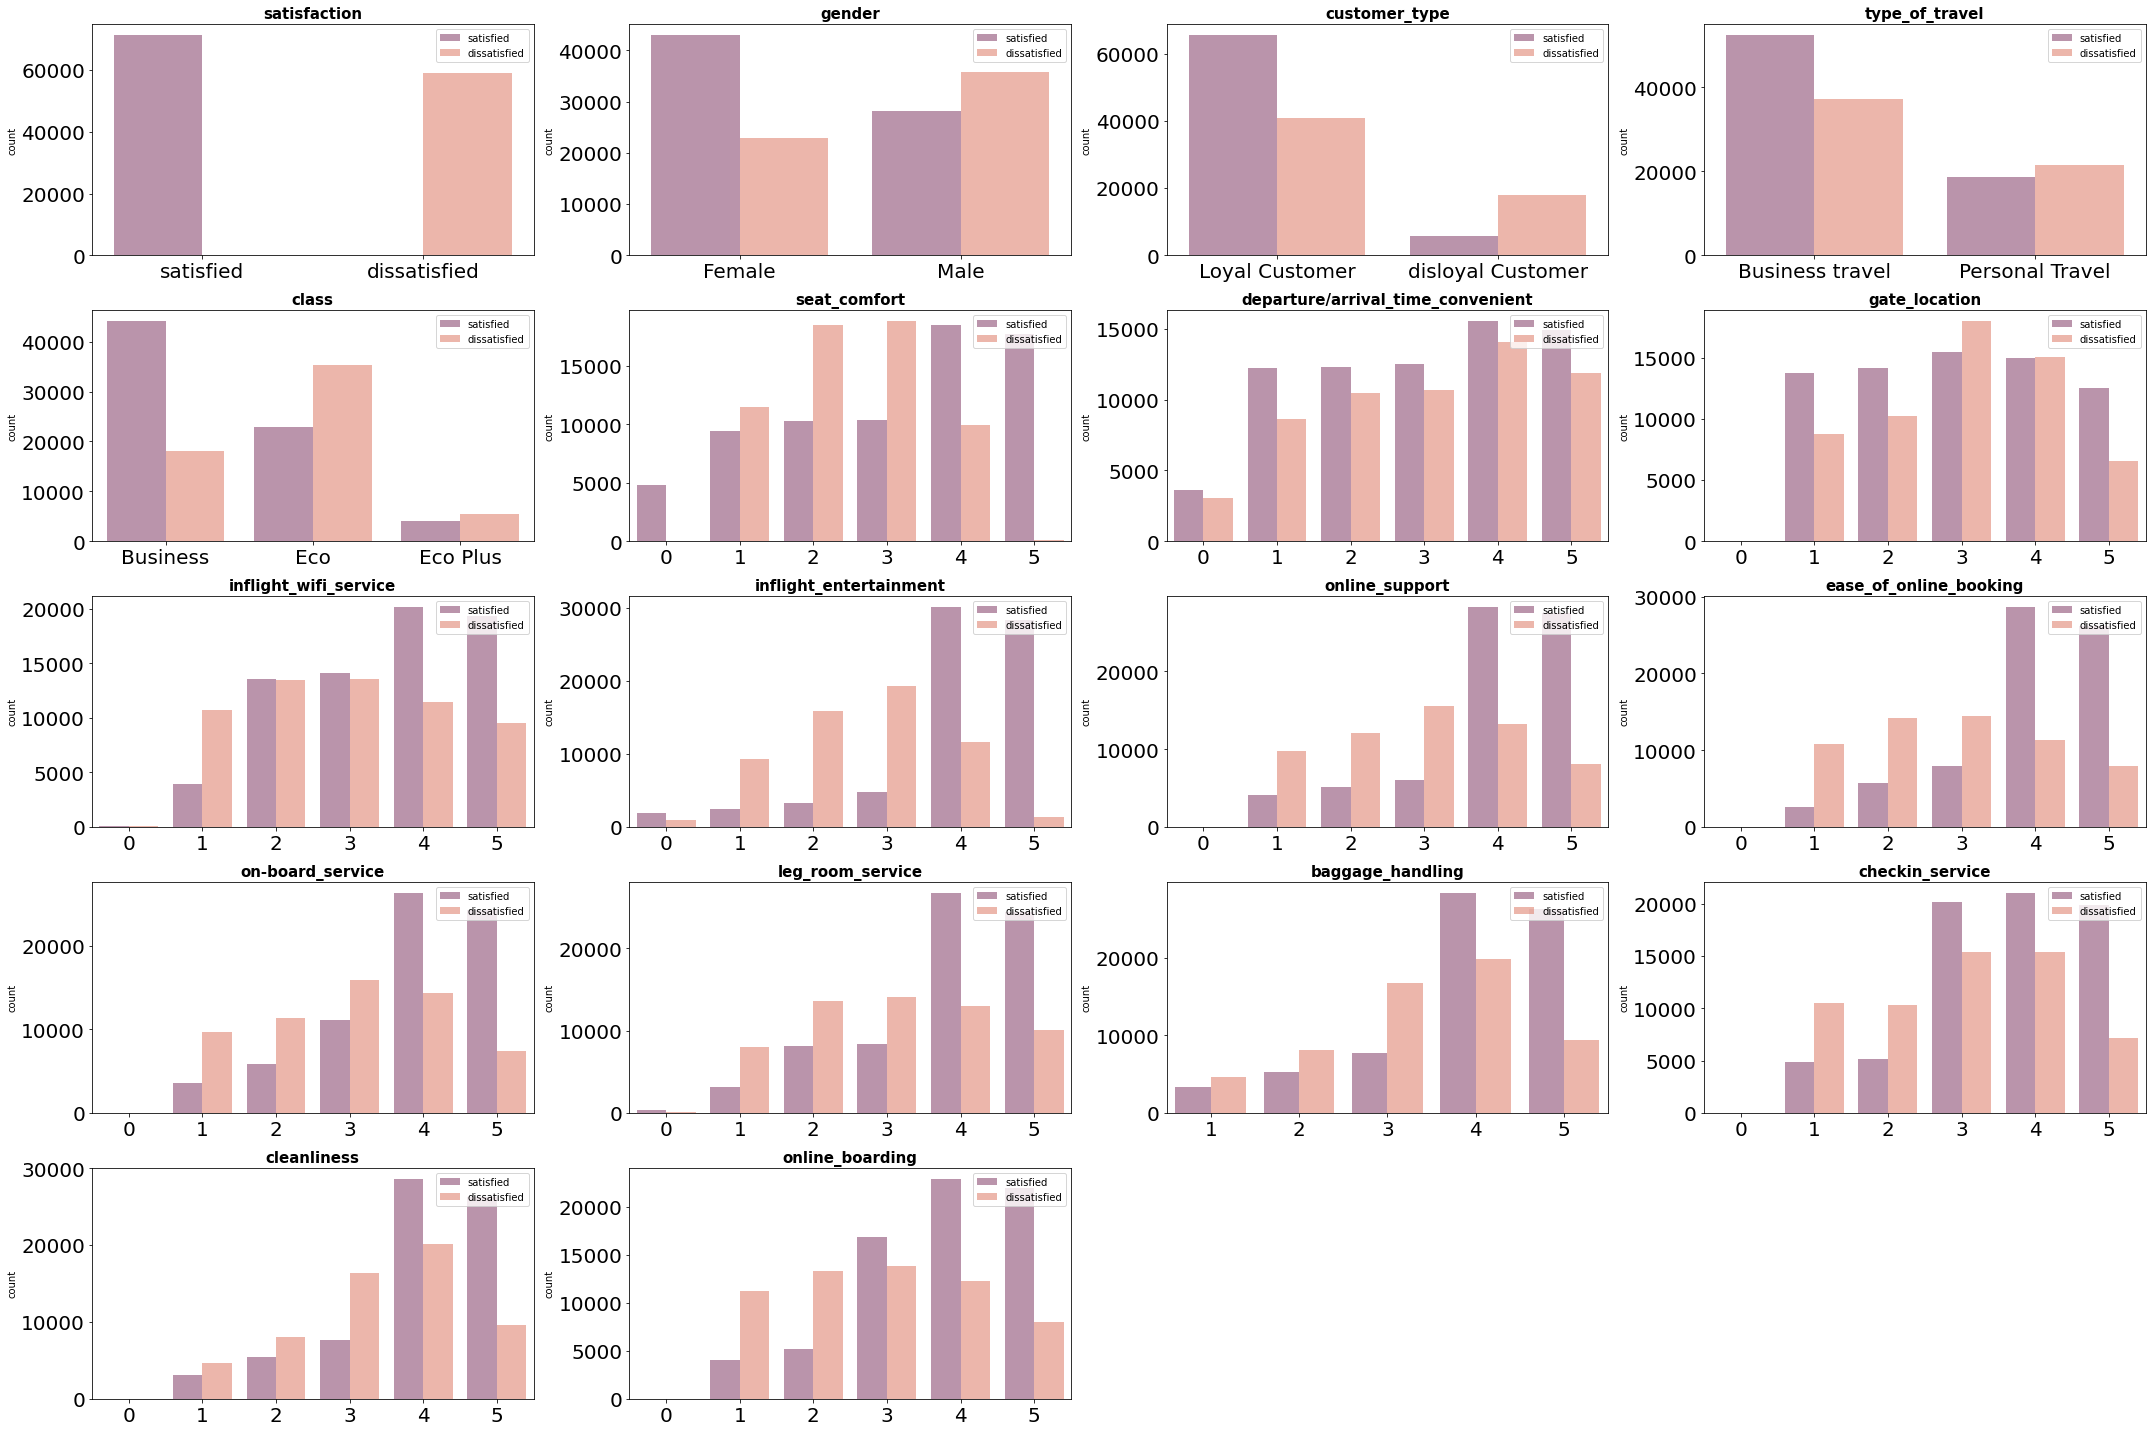

In [32]:
# Gráfico de distribución para cada variable categórica
# ==============================================================================

fig, axes = plt.subplots(nrows = 5, ncols = 4, figsize = (30, 20))

axes = axes.flat

for i, colum in enumerate(df_cat.columns): 
    sns.countplot(
        data = df_cat,
        x = colum,
        hue = "satisfaction",
        palette = 'rocket',
        alpha = 0.5, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].legend(loc= "upper right")
    
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])
fig.tight_layout();

### SEAT COMFORT


In [33]:
df.stb.freq(['seat_comfort', 'satisfaction'])

,seat_comfort,satisfaction,count,percent,cumulative_count,cumulative_percent
0,3,dissatisfied,18794,14.470280,18794,14.470280
1,4,satisfied,18507,14.249307,37301,28.719587
2,2,dissatisfied,18454,14.208500,55755,42.928087
3,5,satisfied,17686,13.617185,73441,56.545273
4,1,dissatisfied,11503,8.856637,84944,65.401909
5,3,satisfied,10389,7.998922,95333,73.400832
6,2,satisfied,10272,7.908839,105605,81.309670
7,4,dissatisfied,9891,7.615491,115496,88.925162
8,1,satisfied,9446,7.272867,124942,96.198029
9,0,satisfied,4787,3.685710,129729,99.883739


In [34]:
mapa_seat = {0:0, 1:2, 2:3, 3:3 , 4:1, 5:0}

In [35]:
df['seat_comfort'] = df['seat_comfort'].map(mapa_seat)

In [36]:
df.head()

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure/arrival_time_convenient,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes
0,satisfied,0,1,1.041667,0,2,-1.400844,0,0,2,2,4,2,3,3,0,3,5,3,2,0.000000
1,satisfied,1,1,0.291667,0,1,0.454852,0,0,3,0,2,2,3,4,4,4,2,3,2,25.833333
2,satisfied,0,1,-1.041667,0,2,0.179747,0,0,3,2,0,2,2,3,3,4,4,4,2,0.000000
3,satisfied,0,1,0.833333,0,2,-1.098734,0,0,3,3,4,3,1,1,0,1,4,1,3,0.000000
4,satisfied,0,1,1.250000,0,2,-1.325738,0,0,3,4,3,4,2,2,0,2,4,2,5,0.000000


### DEPARTURE/ARRIVAL


In [37]:
df.stb.freq(['departure/arrival_time_convenient', 'satisfaction'])

,departure/arrival_time_convenient,satisfaction,count,percent,cumulative_count,cumulative_percent
0,4,satisfied,15523,11.951802,15523,11.951802
1,5,satisfied,14924,11.490607,30447,23.442408
2,4,dissatisfied,14070,10.833077,44517,34.275485
3,3,satisfied,12506,9.628888,57023,43.904373
4,2,satisfied,12312,9.479520,69335,53.383893
5,1,satisfied,12211,9.401755,81546,62.785648
6,5,dissatisfied,11893,9.156914,93439,71.942562
7,3,dissatisfied,10678,8.221435,104117,80.163998
8,2,dissatisfied,10482,8.070527,114599,88.234524
9,1,dissatisfied,8617,6.634586,123216,94.869110


In [38]:
mapa_time = {0:0, 1:3, 2:2, 3:2 , 4:1, 5:1 }

In [39]:
df['departure/arrival_time_convenient'] = df['departure/arrival_time_convenient'].map(mapa_time)

### GATE LOCATION


In [40]:
df.stb.freq(['gate_location', 'satisfaction'])

,gate_location,satisfaction,count,percent,cumulative_count,cumulative_percent
0,3,dissatisfied,18012,13.868186,18012,13.868186
1,3,satisfied,15534,11.960271,33546,25.828457
2,4,dissatisfied,15109,11.633046,48655,37.461503
3,4,satisfied,14979,11.532953,63634,48.994456
4,2,satisfied,14223,10.950878,77857,59.945334
5,1,satisfied,13787,10.615183,91644,70.560517
6,5,satisfied,12562,9.672005,104206,80.232522
7,2,dissatisfied,10295,7.926548,114501,88.159070
8,1,dissatisfied,8778,6.758546,123279,94.917616
9,5,dissatisfied,6599,5.080844,129878,99.998460


In [41]:
mapa_gate = {0:0, 1:2, 2:2, 3:4 , 4:3, 5:1}

In [42]:
df['gate_location'] = df['gate_location'].map(mapa_gate)

### WIFI SERVICE


In [43]:
df.stb.freq(['inflight_wifi_service', 'satisfaction'])

,inflight_wifi_service,satisfaction,count,percent,cumulative_count,cumulative_percent
0,4,satisfied,20137,15.504312,20137,15.504312
1,5,satisfied,19294,14.855251,39431,30.359563
2,3,satisfied,14067,10.830767,53498,41.190330
3,2,satisfied,13581,10.456575,67079,51.646905
4,3,dissatisfied,13535,10.421158,80614,62.068063
5,2,dissatisfied,13464,10.366492,94078,72.434555
6,4,dissatisfied,11423,8.795042,105501,81.229597
7,1,dissatisfied,10762,8.286110,116263,89.515707
8,5,dissatisfied,9536,7.342162,125799,96.857869
9,1,satisfied,3949,3.040499,129748,99.898368


In [44]:
mapa_wifi = {0:0, 1:3, 2:2, 3:2, 4:1, 5:1}

In [45]:
df['inflight_wifi_service'] = df['inflight_wifi_service'].map(mapa_wifi)

### INFLIGHT ENTERTAIMENT


In [46]:
df.stb.freq(['inflight_entertainment', 'satisfaction'])

,inflight_entertainment,satisfaction,count,percent,cumulative_count,cumulative_percent
0,4,satisfied,30150,23.213736,30150,23.213736
1,5,satisfied,28401,21.867108,58551,45.080844
2,3,dissatisfied,19385,14.925316,77936,60.006160
3,2,dissatisfied,15912,12.251309,93848,72.257468
4,4,dissatisfied,11729,9.030644,105577,81.288112
5,1,dissatisfied,9325,7.179704,114902,88.467816
6,3,satisfied,4815,3.707268,119717,92.175085
7,2,satisfied,3271,2.518479,122988,94.693563
8,1,satisfied,2484,1.912535,125472,96.606098
9,0,satisfied,1966,1.513705,127438,98.119803


In [47]:
mapa_entretenimiento = {0:0, 1:3, 2:3, 3:3 , 4:2, 5:1}

In [48]:
df['inflight_entertainment'] = df['inflight_entertainment'].map(mapa_entretenimiento)

### ONLINE SUPPORT


In [49]:
df.stb.freq(['online_support', 'satisfaction'])

,online_support,satisfaction,count,percent,cumulative_count,cumulative_percent
0,4,satisfied,28248,21.749307,28248,21.749307
1,5,satisfied,27497,21.171081,55745,42.920388
2,3,dissatisfied,15499,11.933323,71244,54.853711
3,4,dissatisfied,13262,10.210964,84506,65.064675
4,2,dissatisfied,12141,9.347860,96647,74.412535
5,1,dissatisfied,9824,7.563905,106471,81.976440
6,5,dissatisfied,8066,6.210348,114537,88.186788
7,3,satisfied,6110,4.704342,120647,92.891130
8,2,satisfied,5119,3.941330,125766,96.832461
9,1,satisfied,4113,3.166769,129879,99.999230


In [50]:
mapa_support = {0:0, 1:3, 2:3, 3:3 , 4:2, 5:1}

In [51]:
df['online_support'] = df['online_support'].map(mapa_support)

### ONLINE BOOKING


In [52]:
df.stb.freq(['ease_of_online_booking', 'satisfaction'])

,ease_of_online_booking,satisfaction,count,percent,cumulative_count,cumulative_percent
0,4,satisfied,28640,22.051124,28640,22.051124
1,5,satisfied,26129,20.117801,54769,42.168925
2,3,dissatisfied,14403,11.089467,69172,53.258392
3,2,dissatisfied,14240,10.963967,83412,64.222359
4,4,dissatisfied,11280,8.684940,94692,72.907299
5,1,dissatisfied,10844,8.349245,105536,81.256545
6,3,satisfied,8015,6.171081,113551,87.427626
7,5,dissatisfied,8008,6.165691,121559,93.593317
8,2,satisfied,5711,4.397136,127270,97.990453
9,1,satisfied,2592,1.995688,129862,99.986141


In [53]:
mapa_booking = {0:0, 1:3, 2:3, 3:3 , 4:2, 5:1}

In [54]:
df['ease_of_online_booking'] = df['ease_of_online_booking'].map(mapa_booking)

### ONBOARD SERVICE

In [55]:
df.stb.freq(['on-board_service', 'satisfaction'])

,on-board_service,satisfaction,count,percent,cumulative_count,cumulative_percent
0,4,satisfied,26320,20.264860,26320,20.264860
1,5,satisfied,24287,18.699569,50607,38.964429
2,3,dissatisfied,15937,12.270557,66544,51.234986
3,4,dissatisfied,14355,11.052510,80899,62.287496
4,2,dissatisfied,11324,8.718817,92223,71.006314
5,3,satisfied,11100,8.546350,103323,79.552664
6,1,dissatisfied,9735,7.495380,113058,87.048044
7,5,dissatisfied,7437,5.726055,120495,92.774099
8,2,satisfied,5850,4.504158,126345,97.278257
9,1,satisfied,3530,2.717893,129875,99.996150


In [56]:
mapa_service = {0:0, 1:3, 2:3, 3:4, 4:2, 5:1}

In [57]:
df['on-board_service'] = df['on-board_service'].map(mapa_service)

### LEG ROOM SERVICE


In [58]:
df.stb.freq(['leg_room_service', 'satisfaction'])

,leg_room_service,satisfaction,count,percent,cumulative_count,cumulative_percent
0,4,satisfied,26714,20.568217,26714,20.568217
1,5,satisfied,24365,18.759624,51079,39.327841
2,3,dissatisfied,14113,10.866184,65192,50.194025
3,2,dissatisfied,13559,10.439637,78751,60.633662
4,4,dissatisfied,12984,9.996920,91735,70.630582
5,5,dissatisfied,10020,7.714814,101755,78.345396
6,3,satisfied,8354,6.432091,110109,84.777487
7,2,satisfied,8186,6.302741,118295,91.080228
8,1,dissatisfied,7980,6.144133,126275,97.224361
9,1,satisfied,3161,2.433785,129436,99.658146


In [59]:
mapa_leg = {0:0, 1:3, 2:2, 3:2, 4:1, 5:1}

In [60]:
df['leg_room_service'] = df['leg_room_service'].map(mapa_leg)

### BAGGAGE


In [61]:
df.stb.freq(['baggage_handling', 'satisfaction'])

,baggage_handling,satisfaction,count,percent,cumulative_count,cumulative_percent
0,4,satisfied,28381,21.851709,28381,21.851709
1,5,satisfied,26298,20.247921,54679,42.099630
2,4,dissatisfied,19859,15.290268,74538,57.389898
3,3,dissatisfied,16764,12.907299,91302,70.297197
4,5,dissatisfied,9450,7.275947,100752,77.573144
5,2,dissatisfied,8117,6.249615,108869,83.822759
6,3,satisfied,7721,5.944718,116590,89.767478
7,2,satisfied,5315,4.092239,121905,93.859717
8,1,dissatisfied,4603,3.544041,126508,97.403757
9,1,satisfied,3372,2.596243,129880,100.000000


In [62]:
mapa_baggage = {1:0, 2:0, 3:3, 4:2, 5:1}

In [63]:
df['baggage_handling'] = df['baggage_handling'].map(mapa_baggage)

### CHECKIN


In [64]:
df.stb.freq(['checkin_service', 'satisfaction'])

,checkin_service,satisfaction,count,percent,cumulative_count,cumulative_percent
0,4,satisfied,21050,16.207268,21050,16.207268
1,3,satisfied,20160,15.522020,41210,31.729289
2,5,satisfied,19869,15.297967,61079,47.027256
3,4,dissatisfied,15431,11.880967,76510,58.908223
4,3,dissatisfied,15378,11.840160,91888,70.748383
5,1,dissatisfied,10508,8.090545,102396,78.838928
6,2,dissatisfied,10339,7.960425,112735,86.799353
7,5,dissatisfied,7136,5.494302,119871,92.293656
8,2,satisfied,5147,3.962889,125018,96.256545
9,1,satisfied,4861,3.742686,129879,99.999230


In [65]:
mapa_check = {0:0, 1:3, 2:3, 3:2, 4:2, 5:1}

In [66]:
df['checkin_service'] = df['checkin_service'].map(mapa_check)

### CLEANLINESS


In [67]:
df.stb.freq(['cleanliness', 'satisfaction'])

,cleanliness,satisfaction,count,percent,cumulative_count,cumulative_percent
0,4,satisfied,28629,22.042655,28629,22.042655
1,5,satisfied,26272,20.227903,54901,42.270557
2,4,dissatisfied,20166,15.526640,75067,57.797197
3,3,dissatisfied,16358,12.594703,91425,70.391900
4,5,dissatisfied,9644,7.425316,101069,77.817216
5,2,dissatisfied,7985,6.147983,109054,83.965199
6,3,satisfied,7626,5.871574,116680,89.836772
7,2,satisfied,5427,4.178472,122107,94.015245
8,1,dissatisfied,4635,3.568679,126742,97.583924
9,1,satisfied,3133,2.412227,129875,99.996150


In [68]:
mapa_limp = {0:0, 1:3, 2:3, 3:4, 4:2, 5:1}

In [69]:
df['cleanliness'] = df['cleanliness'].map(mapa_limp)

### ONLINE BOARDING


In [70]:
df.stb.freq(['online_boarding', 'satisfaction'])


,online_boarding,satisfaction,count,percent,cumulative_count,cumulative_percent
0,4,satisfied,22946,17.667077,22946,17.667077
1,5,satisfied,21933,16.887127,44879,34.554204
2,3,satisfied,16919,13.026640,61798,47.580844
3,3,dissatisfied,13861,10.672159,75659,58.253003
4,2,dissatisfied,13352,10.280259,89011,68.533261
5,4,dissatisfied,12235,9.420234,101246,77.953496
6,1,dissatisfied,11291,8.693409,112537,86.646905
7,5,dissatisfied,8040,6.190330,120577,92.837234
8,2,satisfied,5221,4.019864,125798,96.857099
9,1,satisfied,4068,3.132122,129866,99.989221


In [71]:
mapa_board = {0:0, 1:4, 2:4, 3:2, 4:3, 5:1}

In [72]:
df['online_boarding'] = df['online_boarding'].map(mapa_board)

## CODIFICACIÓN DE VR 'SATISFACTION'

In [73]:
df.stb.freq(['satisfaction'])

,satisfaction,count,percent,cumulative_count,cumulative_percent
0,satisfied,71087,54.73283,71087,54.73283
1,dissatisfied,58793,45.26717,129880,100.00000


In [74]:
mapa_satis = {'satisfied':0, 'dissatisfied':1}

In [75]:
df['satisfaction'] = df['satisfaction'].map(mapa_satis)

In [76]:
df.stb.freq(['satisfaction'])

,satisfaction,count,percent,cumulative_count,cumulative_percent
0,0,71087,54.73283,71087,54.73283
1,1,58793,45.26717,129880,100.00000


In [77]:
df.head()

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure/arrival_time_convenient,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes
0,0,0,1,1.041667,0,2,-1.400844,0,0,2,2,2,3,3,4,0,3,1,4,4,0.000000
1,0,1,1,0.291667,0,1,0.454852,0,0,4,0,3,3,3,2,1,2,3,4,4,25.833333
2,0,0,1,-1.041667,0,2,0.179747,0,0,4,2,0,3,3,4,2,2,2,2,4,0.000000
3,0,0,1,0.833333,0,2,-1.098734,0,0,4,2,2,3,3,3,0,0,2,3,2,0.000000
4,0,0,1,1.250000,0,2,-1.325738,0,0,4,1,3,2,3,3,0,0,2,3,1,0.000000


- BALANCEO DE VR SATISFACTION ???

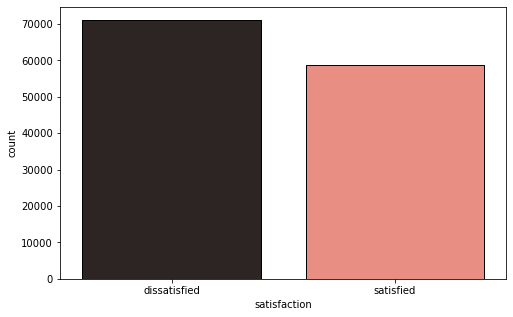

In [83]:
plt.figure(figsize=(8,5)) # para cambiar el tamaño de la figura

fig1 = sns.countplot(data = df, x = "satisfaction",  palette = "dark:salmon",  edgecolor='black')
fig1.set(xticklabels=["dissatisfied", "satisfied"]) 
plt.show();